# Chemical Equilibrium
This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 2 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 10 February 2020.

The objectives of this tutorial are: 1) to review and expand on the discussion of chemical equilibrium that is provided in Chapter 2 of Turns 4th ed.; and 2) to show how to compute equilibrium temperatures and compositions using Cantera's `Solution()` object and its `equilibrate()` function. We will define gas mixtures using gri30.cti and nasa.cti. 

The reader should be familiar with the material in the previous Notebook (2_7_Entropy_Gibbs_function_equilibrium_constants) before working through this Notebook.

## 1. Physical concepts

Consider a gas mixture whose initial composition is given, either in terms of the relative proportions of a specified list of molecules (e.g., mass fractions or mole fractions of specified species) or in terms of relative proportions of a specified list of elements (e.g., relative proportions of carbon, hydrogen, oxygen, and nitrogen atoms, regardless of what molecules they are bound up in). The initial thermodynamic state of the mixture is also given: e.g., its pressure and temperature. 

In this mixture, molecules are colliding and chemical reactions are taking place, so that the composition of the mixture can change with time. New species may be formed that were not present in the initial mixture. Consider further a case where the system is isolated so that there is no heat transfer to or from the surroundings (adiabatic) and the mixture pressure is held constant, say. Then we expect that given sufficient time, the system eventually will reach a new steady thermochemical state in which molecular collisions and chemical reactions are still occurring, but the net rates of creation or destruction of all species are equal to zero, so that the composition of the mixture no longer changes with time. This final state corresponds to chemical equilibrium.

The equilbrium composition and temperature will be different, depending on the thermodynamic constraints under which the system evolves. For example, the equilibrium composition and temperature will be different for a constant-pressure adiabatic system (constant mixture enthalpy and pressure) than for a constant-volume adiabatic system (constant mixture internal energy and volume). In general, the equilibrium composition and temperature will be the ones that maximize the entropy of the system, subject to the constraints. 

In all cases, the relative proportions of the elements in the equilibrium mixture must remain the same as their relative proportions in the initial mixture. However, the types of molecules that are present in equilibrium can be very different from those that were present in the initial mixture. In principle, any molecule that contains the elements that are present in the initial mixture may be present in the equilibrium mixture. For example, for an initial mixture that corresponds to hydrocarbon-air reactants (with our usual approximation for air), the equilibrium mixture may contain any molecule that contains (at most) carbon, hydrogen, oxygen, and nitrogen atoms. That is a very long list of possible molecules.

In most cases, only a small fraction of the molecular species that could possibly be present in the equilibrium mixture are actually present in non-negligible quantities. One cannot directly constrain the molecules that are formed in a real physical system. However, in manual or numerical equilibrium calculations, it is expedient and necessary to limit the possible molecules to a prescribed list of *allowable species*. Knowing which species should be considered is a matter of experience. In the examples that follow, the list of allowable species is given. The influence of changing the list of allowable species on the resulting equilibrium composition and temperature is also explored.

At this stage, we cannot say anything about how long it would take for a system to reach chemical equilibrium. That depends on the initial state, and on the thermodynamic process through which it evolves. It may take a small fraction of a second, or it may take years. We will discuss the rates at which chemical reactions proceed when we get to the subject of chemical kinetics in Chapters 4 and 5 of Turns 4th ed.

### 1.1 Equilibrium composition for a given mixture pressure and temperature

The starting point in most introductory discussions of chemical equilibrium is to consider the equilibrium of a mixture of molecular gases at a given pressure and temperature. That is the approach that is followed in Chapter 2 of Turns 4th ed. There it is shown that the equilibrium composition of the mixture (e.g., the equilbrium mole fractions of each species) is the composition that minimizes the Gibbs free energy of the mixture, subject to the constraints. The constraints are that the relative proportions of each element in the system must remain the same as those in the initial mixture. Also, as noted earlier, a list of allowable species must be specified. 

We denote the number of allowable species as $N_{spec}$ and the number of different elements (kinds of atoms) in the system as $N_{elem}$. In hydrocarbon-air combustion, normally $N_{elem} = 4$: carbon, hydrogen, oxygen, and nitrogen. The task, then, is to find the $N_{spec}$ equilibrium mole fractions, for a given mixture pressure and temperature. To do that, we need to develop a system of $N_{spec}$ independent equations involving the $N_{spec}$ unknown mole fractions. 

While there are various ways in which equilibrium problems can be posed, from the given information it will always be possible to write $N_{elem}$ linear equations (corresponding to the $N_{elem}$ element balances) involving the $N_{spec}$ unknown mole fractions. If $N_{spec} = N_{elem}$ (as in the cases that we had considered before introducing chemical equilibrium), then the equilibrium composition is determined by stoichiometric considerations (element balances) alone, and nothing more needs to be done.

In the more frequent case where $N_{spec} > N_{elem}$, we need $N_{spec} - N_{elem}$ more equations. Those can be developed formally by considering the equilbrium of $N_{spec} - N_{elem}$ reversible reactions that involve the $N_{spec}$ species. Each equilibrium reaction gives a nonlinear equation that relates the unknown mole fractions of a subset of the $N_{spec}$ species. Specifically, it gives an equation that relates the change in Gibbs function for the reaction to the equilibrium partial pressures of the species that participate in the reaction (see tutorial Notebook 2_7_Entropy_Gibbs_function_equlibrium_constants). At the specified temperature, one can look up the Gibbs function of formation for each species to compute the change in Gibbs function for the reaction, and compute the value of the equilibrium constant (specifically, the partial-pressure equilibrium constant $ \kappa _ p $) for the reaction. And for an ideal-gas mixture, one can express the species partial pressures in terms of the species mole fractions and the mixture pressure. A key question, then, is: Which equilbrium reactions should one choose? A fortuitous consequence of the principles of thermodynamics is that it does not matter, as long as the end result is a system of $N_{spec}$ independent equations relating the $N_{spec}$ unknown species mole fractions. 

Then one must solve the system of $N_{spec}$ equations for the $N_{spec}$ unknown mole fractions. Of the $N_{spec}$ equations, $N_{elem}$ equations (corresponding to the element balances) are linear, while the remainder (corresponding to equilibrium of a specified set of reversible reactions involving the $N_{spec}$ species) are generally nonlinear. It can be quite tedious to solve this system of equations manually, in cases where more than one or two equilibrium reactions are involved. A general method for solving systems of nonlinear equations, which lends itself to spreadsheet programming or a short computer program, is provided in Appendix E of Turns 4th ed.

Finally, we note that while the "classical" approach based on Gibbs function minimization and equilibrium constants can be used as the basis for numerical equilibrium calculations, alternative (but equivalent) approaches are often used in modern computational combustion software.

### 1.2 More general cases

At this point in our study of combustion, we know (in principle) how to compute the product temperature for a given reactant mixture composition, pressure, and temperature, a given product composition (e.g., corresponding to complete combustion), and a specified thermodynamic process (e.g., constant-pressure adiabatic, or constant-volume adiabatic). To do that, one applies the first law of thermodynamics, using the appropriate species thermodynamic properties: enthalpies of formation, and sensible enthalpies. That was the subject of tutorial Notebook 2_6_Adiabatic_flame_temperature.

We also know (in principle) how to find the equilibrium composition for a given initial mixture composition, a given list of allowable species, and a given mixture pressure and temperature. To do that, one applies the second law of thermodynamics, using the appropriate species thermodynamic properties: Gibbs functions, or (equivalently) equilibrium constants. That is the subject of Section 1.1 above.

In practice, neither the product temperature nor the product composition would be known in a practical combustion problem. In that case, we need to find both the final (or product, or equilibrium) temperature and composition for a given reactant mixture composition, temperature, and pressure and for a specified thermodynamic process. This requires simultanous application of both the first and second laws of thermodynamics. For example, for a constant-pressure adiabatic combustion process, one would need to find the product temperature and composition that simultaneously satisfy the first law (product enthalpy is equal to reactant enthalpy) and the second law (product composition minimizes the Gibbs free energy at the product temperature and pressure). To do this manually using thermodynamic property tables would require iteration and would be rather tedious, but is doable in principle.

Furthermore, constant-pressure adiabatic combustion is just one of many possibilities. More generally, we would like to simultaneously find the equilibrium temperature and composition for a given reactant composition, given reactant thermodynamic state (e.g., reactant pressure and temperature), and an arbitrary thermodynamic process that is specified by holding any two mixture thermodynamic properties constant: for example, enthalpy and pressure are constant for a constant-pressure adiabatic process, while internal energy and volume are constant for a constant-volume adiabatic process.

So, rather than writing a Cantera program that mimics the manual calculation method that one would use to find the equilibrium composition for a specified mixture pressure and temperature, at this point we directly invoke Cantera's [`equilibrate()`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.equilibrate) function, which was introduced briefly in the previous tutorial Notebook. With this function, we can compute the equilibrium composition and thermodynamic state of a mixture for several different thermodynamic processes.

## 2. Cantera's `equilibrate()` function

In [1]:
# access modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# report Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define an ideal-gas mixture named "gas1" using Cantera's "Solution()" object and GRI-Mech 3.0
gas1 = ct.Solution('gri30.cti')

# list all available attributes of "gas1"
dir(gas1)

['DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'ID',
 'P',
 'P_sat',
 'SP',
 'SPX',
 'SPY',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TP',
 'TPX',
 'TPY',
 'T_sat',
 'UV',
 'UVX',
 'UVY',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_check_kinetics_species_index',
 '_check_phase_index',
 '_check_reaction_index',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_references',
 'activities',
 'activity_coefficients',
 'add_reaction',
 'add_species',
 'atomic_weight',
 'atomic_weights',
 'basis',
 'binary_diff_coeffs',
 'chemical_potentials',
 'concentrations',
 'cp',
 'cp_mass',
 'cp_mole',
 'cr

In [3]:
# get help for "equilibrate"
help(gas1.__class__.equilibrate)

Help on method_descriptor:

equilibrate(...)
    ThermoPhase.equilibrate(self, XY, solver='auto', double rtol=1e-9, int maxsteps=1000, int maxiter=100, int estimate_equil=0, int loglevel=0)
    
    Set to a state of chemical equilibrium holding property pair
    *XY* constant.
    
    :param XY:
        A two-letter string, which must be one of the set::
    
            ['TP','TV','HP','SP','SV','UV']
    
    :param solver:
        Specifies the equilibrium solver to use. May be one of the following:
    
        * ''element_potential'' - a fast solver using the element potential
          method
        * 'gibbs' - a slower but more robust Gibbs minimization solver
        * 'vcs' - the VCS non-ideal equilibrium solver
        * "auto" - The element potential solver will be tried first, then
          if it fails the Gibbs solver will be tried.
    :param rtol:
        the relative error tolerance.
    :param maxsteps:
        maximum number of steps in composition to take to find

The `equilibrate()` function can accept a number of parameters as arguments. There are several optional numerical parameters, for example, that control the internal workings of the equilibrium solver. For our purposes, we can accept the default values for all of those. Note that three different methods are available to solve the equilbrium problem. One of these is the Gibbs minimization method, which is essentially the method that is discussed in Chapter 2 of Turns 4th ed. and summarized in Section 1 above. Most modern numerical equilibrium solvers, including Cantera, use a different default method to compute chemical equilibrium: an *element potential* method. The interested reader can look up references for that class of methods. 

Note that six different options are available for the pairs of mixture thermodynamic properties that can be held constant during the equilibrium calculation. The two properties that are held constant should be clear from the names: for example, "HP" corresponds to constant mixture enthalpy and pressure, which is appropriate for a constant-pressure adiabatic process.

In the examples that follow, we switch to the nasa.cti thermodynamic property database. The file nasa.cti contains thermodynamic properties for many more species compared to gri30.cti. Moreover, the thermodynamic property data in nasa.cti are valid over a wider temperature range compared to those in gri30.cti.

### 2.1 Dissociation of a diatomic molecular gas

As a first example of an equilibrium calculation using Cantera, we consider the dissociation of diatomic oxygen molecules into free oxygen atoms. The corresponding equilibrium reaction is: $ {\rm O}_2 \leftrightharpoons 2 {\rm O} $. Note the we do not need to explicitly specify the equilbrium reaction to solve the problem using `equilibrate()`, though.

We begin by defining a gas mixture that contains only diatomic oxygen molecules and free oxygen atoms: two allowable species. We then look at the degree of dissociation (how much O is present in equilibrium) as a function of mixture temperature and pressure. 

In [4]:
# define an ideal-gas mixture that contains only O2 and O, using property data in nasa.cti
species = {S.name: S for S in ct.Species.listFromFile('nasa.cti')}
two_species = [species[S] for S in ('O2','O')]
gas2 = ct.Solution(thermo='IdealGas',species=two_species) 

In [5]:
# print the number of species in "gas2"
gas2.n_species

2

In [6]:
# print the full thermochemical state of "gas2"
gas2()


       temperature           0.001  K
          pressure     0.000259837  Pa
           density           0.001  kg/m^3
  mean mol. weight         31.9988  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.7645e+05       -8.846e+06     J
   internal energy     -2.7645e+05       -8.846e+06     J
           entropy         -698.72       -2.236e+04     J/K
    Gibbs function     -2.7645e+05       -8.846e+06     J
 heat capacity c_p          982.82        3.145e+04     J/K
 heat capacity c_v          722.98        2.313e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2              1                1     -1.06394e+06
     [   +1 minor]              0                0



Note that the default mixture pressure and temperature are different here, compared to when we used gri30.cti. We will discuss why that is the case in a later tutorial Notebook, where we will look more closely at the contents of a .cti file.

While gas2 has all the attributes of a `Solution()` object, as currently defined it contains no explicit information about chemical reactions. To see this:

In [7]:
# print the number of chemical reactions in gas2
gas2.n_reactions

0

That is not a problem, for current purposes. In fact, the only information that is needed to perform the equilbrium calculation is thermodynamic property data for the two species $O_2$ and $O$, and their elemental compositions: two atoms of oxygen per $O_2$ molecule, and one atom of oxygen per $O$ molecule. The elemental composition information is sufficient to (effectively) reconstruct the equilibrium reaction $O_2 \leftrightharpoons 2O $ internally, although it is not really necessary to do that explicitly.

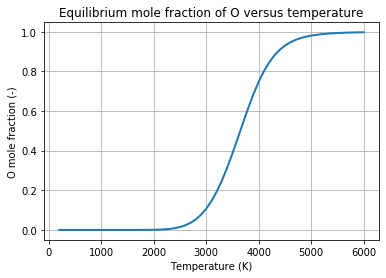

In [8]:
# compute and plot the equilibrium O-atom mole fraction as a function of temperature at 1 atm mixture pressure

pres = ct.one_atm

tmin = gas2.min_temp
tmax = gas2.max_temp + 1.
delt = 100.
temp = np.arange(tmin,tmax,delt)
nt   = len(temp)
O_eq = np.zeros(nt)

for i , T in enumerate(temp):
    gas2.TP  = T , pres                        # set gas2 temperature and pressure
    gas2.equilibrate('TP')                     # reset gas2 to the equilibrium composition for the given T and p
    O_eq[i] = gas2.X[gas2.species_index('O')]  # equilibrium mole fraction of O
    
fig, ax = plt.subplots()
ax.plot(temp, O_eq, lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='O mole fraction (-)',
       title ='Equilibrium mole fraction of O versus temperature')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("O_eq_vs_T.pdf")

First, note that the temperature range over which the current thermodynamic property data are intended to be used is from 200 K to 6000 K. This is a much wider range compared to that for gri30.cti, which we saw earlier.

The degree of dissociation is small (less than 1%) for temperatures less than approximately 2000 K. The degree of dissociation increases rapidly with increasing temperature for temperatures between approximately 3000 K and 4000 K. Little $O_2$ is left at temperatures above 5000 K.

The result is consistent with the principle of Le Chatelier. As temperature increases (for a fixed mixture pressure), equilibrium shifts toward the endothermic direction of the equilibrium reaction $O_2 \rightleftharpoons 2O$ : more $O$, and less $O_2$. Even though no explicit information about reactions is included in gas2, the thermodynamic properties of $O_2$ can be compared to those of $2O$ to determine the endothermic/exothermic direction of the equilibrium reaction.

Next, we look at the influence of pressure on dissociation at a fixed temperature.

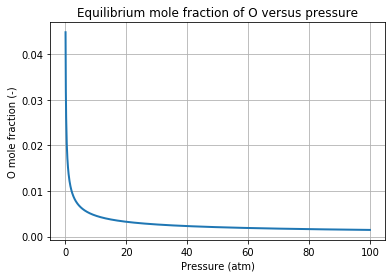

In [9]:
# compute and plot the equilibrium O-atom mole fraction as a function of mixture pressure at a temperature of 2500 K

temp = 2500.

# here the pressures are given in atm
pmin =   0.1
pmax = 100.01
delp =   0.1
pres = np.arange(pmin,pmax,delp)
npr  = len(pres)
O_eq = np.zeros(npr)

for i , P in enumerate(pres):
    gas2.TP  = temp , P*ct.one_atm             # set gas2 temperature and pressure, converting pressure to Pa
    gas2.equilibrate('TP')                     # set gas2 to the equilibrium composition for the given T and p
    O_eq[i] = gas2.X[gas2.species_index('O')]  # equilibrium mole fraction of O
    
fig, ax = plt.subplots()
ax.plot(pres, O_eq, lw=2)
ax.set(xlabel='Pressure (atm)',
       ylabel='O mole fraction (-)',
       title ='Equilibrium mole fraction of O versus pressure')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("O_eq_vs_p.pdf")

The degree of dissociation increases with decreasing pressure (for a fixed temperature). The increase is rapid for low (especially for sub-atmospheric) pressures.

The result is again consistent with the principle of Le Chatelier. As pressure decreases (for a fixed temperature), equilibrium shifts toward the direction in which there are more moles: more $O$, and less $O_2$. And again, no explicit information about reactions is needed to perform the calculation: stoichiometric considerations and thermodynamic property data are sufficient.

### 2.2 Dissociation of CO$_2$

In a similar manner, we can reproduce Figure 2.12 of Turns 4th ed. For this purpose, we consider the equilibrium of a mixture that contains only the three species $CO_2$, $CO$, and $O_2$. We are, then, effectively considering the equilibrium of the reaction: $ {\rm CO}_2 \leftrightharpoons {\rm CO} + 0.5 {\rm O}_2 $. But again, we do not need to explicitly specify this reaction to solve the problem.

In [10]:
# define an ideal-gas mixture that contains only CO2, CO, and O2
species = {S.name: S for S in ct.Species.listFromFile('nasa.cti')}
three_species = [species[S] for S in ('CO2', 'CO', 'O2')]
gas3 = ct.Solution(thermo='IdealGas',species=three_species)

gas3()


       temperature           0.001  K
          pressure     0.000188923  Pa
           density           0.001  kg/m^3
  mean mol. weight         44.0098  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -9.1386e+06       -4.022e+08     J
   internal energy     -9.1386e+06       -4.022e+08     J
           entropy          2592.3        1.141e+05     J/K
    Gibbs function     -9.1386e+06       -4.022e+08     J
 heat capacity c_p          445.25         1.96e+04     J/K
 heat capacity c_v          256.33        1.128e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
               CO2              1                1      -4.8372e+07
     [   +2 minor]              0                0



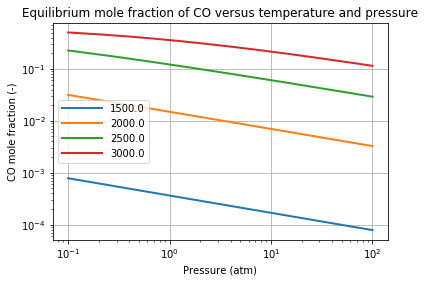

In [11]:
# compute and plot the equilibrium CO mole fraction as a function of mixture pressure and temperature
#   over the temperature and pressure ranges shown in Figure 2.12 of Turns 4th ed.

tmin = 1500.
tmax = 3001.
delt = 500.
temp = np.arange(tmin,tmax,delt)
nt   = len(temp)

# here the pressures are in atm
pmin =   0.1
pmax = 100.01
delp =   0.1
pres = np.arange(pmin,pmax,delp)
npr  = len(pres)

# define a 2D array to hold the equilibrium mole fraction of CO as a function of temperature and pressure
CO_eq = np.zeros(shape=(nt,npr))

for i , T in enumerate(temp):     # loop over temperatures
    for j , P in enumerate(pres): # loop over pressures for each temperature
        gas3.TP  = T , P*ct.one_atm                    # set gas3 temperature and pressure, converting pressures to Pa
        gas3.equilibrate('TP')                         # set gas3 to the equilibrium composition for the given T and p
        CO_eq[i,j] = gas3.X[gas3.species_index('CO')]  # equilibrium mole fraction of CO

# plot one curve for each value of the temperature
# use log-log axes, as in Figure 2.12 of Turns 4th ed.
fig, ax = plt.subplots()
for i , T in enumerate(temp):
    ax.loglog(pres, CO_eq[i,:], label=T, lw=2)    
ax.set(xlabel='Pressure (atm)',
       ylabel='CO mole fraction (-)',
       title ='Equilibrium mole fraction of CO versus temperature and pressure')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("CO_eq_vs_Tandp.pdf")

Note the approximately linear variation of equilibrium $CO$ mole fraction with pressure, when log-log axes are used. The results are consistent with those in Figure 2.12 of Turns 4th ed. They are also consistent with the principle of Le Chatelier: for a fixed temperature, equilibrium shifts toward the direction of fewer moles (more $CO_2$, less $CO$) with increasing pressure; and for a fixed pressure, equilibrium shifts toward the endothermic direction (more $CO$, less $CO_2$) with increasing temperature.

Here the dissociation of $O_2$ molecules has been neglected. It could easily be included by adding $O$ as a fourth allowable species in the mixture.

### 2.3 Complete combustion of a hydrocarbon fuel with air

Here we will take the fuel to be propane, and make our standard approximation for air, as in the examples in Chapter 2 of Turns 4th ed.

We first consider complete combustion. In that case, our mixture can contain at most five species: $C_3H_8$, $O_2$, $N_2$, $CO_2$, and $H_2O$. It is emphasized that this is only a first approximation, and it is generally only a reasonable first approximation for fuel-lean-to-stoichiometric reactants: equivalence ratios $0 < \Phi \le 1$.

In [12]:
# define an ideal-gas mixture that contains only C3H8, O2, N2, CO2, and H2O
species = {S.name: S for S in ct.Species.listFromFile('nasa.cti')}
five_species = [species[S] for S in ('C3H8','O2','N2','CO2','H2O')]
gas5 = ct.Solution(thermo='IdealGas', species=five_species)

gas5()


       temperature           0.001  K
          pressure     0.000188551  Pa
           density           0.001  kg/m^3
  mean mol. weight         44.0965  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.7116e+06       -1.196e+08     J
   internal energy     -2.7116e+06       -1.196e+08     J
           entropy         -636.78       -2.808e+04     J/K
    Gibbs function     -2.7116e+06       -1.196e+08     J
 heat capacity c_p             794        3.501e+04     J/K
 heat capacity c_v          605.44         2.67e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
              C3H8              1                1     -1.43812e+07
     [   +4 minor]              0                0



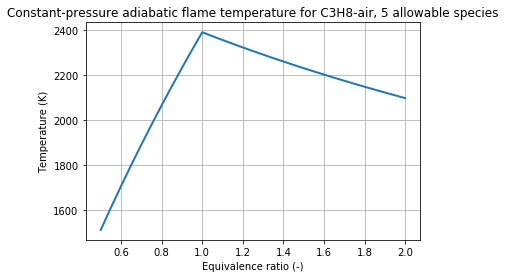

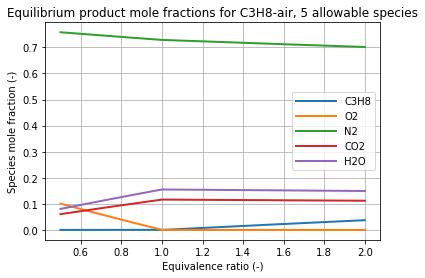

In [13]:
# compute and plot the constant-pressure adiabatic flame temperature and the equilibrium species mole fractions
#   as functions of equivalence ratio, for reactants at 298.15 K and 1 atm
# note that the product temperature is computed as part of the solution, rather than being specified

# specify the equivalence ratios for which to compute the equilibrium temperature and mixture composition
# for fuel-rich mixtures, it is not really appropriate, even as a first approximation, to limit the allowable species
#   to the five that are considered here; however, it is instructive to see what happens if we do that
phimin = 0.5
phimax = 2.001
delphi = 0.01
phis   = np.arange(phimin,phimax,delphi)
nphi   = len(phis)

# define arrays to hold equilibrium temperature and species mole fractions
T_eq_5species    = np.zeros(nphi)
C3H8_eq_5species = np.zeros(nphi)
O2_eq_5species   = np.zeros(nphi)
N2_eq_5species   = np.zeros(nphi)
CO2_eq_5species  = np.zeros(nphi)
H2O_eq_5species  = np.zeros(nphi)
    
fuel = 'C3H8'
air  = 'O2:1., N2:3.76'

# note that the appropriate thermodynamic process for constant-pressure adiabatic combustion is "HP" 
#   corresponding to constant mixture enthalpy and pressure
for i , phi in enumerate(phis):
    gas5.TP = 298.15, ct.one_atm                  # set mixture T and p to reactants T and p
    gas5.set_equivalence_ratio(phi, fuel, air)    # set mixture composition to reactants at the desired equiv. ratio
    gas5.equilibrate('HP')                        # compute the equilibrium mixture state
#    gas5.equilibrate('UV') # replace the previous line with this one to compute constant-volume adiabatic equilibrium
    T_eq_5species[i]    = gas5.T
    C3H8_eq_5species[i] = gas5.X[gas5.species_index('C3H8')]
    O2_eq_5species[i]   = gas5.X[gas5.species_index('O2')]
    N2_eq_5species[i]   = gas5.X[gas5.species_index('N2')]
    CO2_eq_5species[i]  = gas5.X[gas5.species_index('CO2')]
    H2O_eq_5species[i]  = gas5.X[gas5.species_index('H2O')]
    
# plot the constant-pressure adiabatic flame temperature versus equivalence ratio
fig, ax = plt.subplots()
ax.plot(phis, T_eq_5species, lw=2)
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Temperature (K)',
       title ='Constant-pressure adiabatic flame temperature for C3H8-air, 5 allowable species')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("T_eq_5species_C3H8.pdf")

# plot the equilibrium species mole fractions versus equivalence ratio
fig, ax = plt.subplots()
ax.plot(phis, C3H8_eq_5species, label='C3H8', lw=2)
ax.plot(phis, O2_eq_5species,   label='O2',   lw=2)
ax.plot(phis, N2_eq_5species,   label='N2',   lw=2)
ax.plot(phis, CO2_eq_5species,  label='CO2',  lw=2)
ax.plot(phis, H2O_eq_5species,  label='H2O',  lw=2)
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Species mole fraction (-)',
       title ='Equilibrium product mole fractions for C3H8-air, 5 allowable species')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("X_eq_5species_C3H8.pdf")

In all cases, the product water is in the gas phase, as would be expected at these temperatures and at 1 atm pressure.

The results are at least qualitatively reasonable for equivalence ratios less than or equal to one. The product temperature increases with increasing equivalence ratio over this range, while the $O_2$ product mole fraction decreases, the product mole fractions of $CO_2$ and $H_2O$ increase, and the product mole fraction of fuel is equal to zero.

The peak computed flame temperature is approximately 2400 K, at an equivalence ratio of one. For stoichiometric reactants (equivalence ratio of one), there is no fuel and no $O_2$ in the equilibrium products.

For equivalence ratios greater than one, there is left-over fuel in the products, and the amount of left-over fuel increases with increasing equivalence ratio. It is not realistic to have $C_3H_8$ remaining at these temperatures, as we will see shortly when we allow for additional carbon-containing and hydrogen-containing species. Also, the mole fractions of $CO_2$ and $H_2O$ remain essentially constant with increasing equivalence ratio for fuel-rich mixtures. This is also not realistic.

Here we have considered a constant-pressure adiabatic process. To consider a constant-volume adiabatic process, we would specify "UV" rather than "HP" in the `equilibrate()` function. The resulting temperature would then be the constant-volume adiabatic flame temperature, and it would be higher than the constant-pressure adiabatic flame temperature. This can be confirmed by rerunning the above cell after replacing "HP" by "UV" in the `equilibrate()` function.

### 2.4 Expanding the list of allowable species

We next allow for one additional carbon-containing species ($CO$) and one additional hydrogen-containing species ($H_2$) in the mixture. This will give more realistic results for fuel-rich reactant mixtures, in particular, although it is still only an approximation. 

As discussed in Chapter 2 of Turns 4th ed., one can solve manually to get a first approximation for the fuel-rich product composition by considering these species, with the additional assumption that there is no $O_2$ in the products for $\Phi > 1$. The manual calculations can be done by considering equilibrium of the water-gas-shift reaction. In Cantera, we do not need to explicitly provide any information about which specific equilibrium chemical reactions to consider, as discussed earlier.

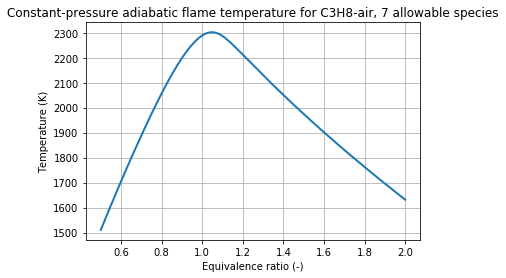

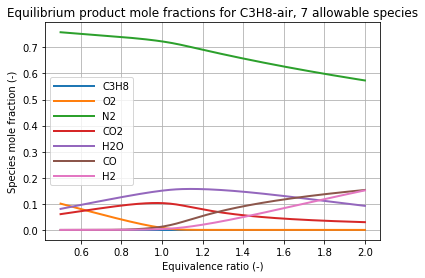

In [14]:
# define an ideal-gas mixture that contains only C3H8, O2, N2, CO2, H2O, CO, and H2
species = {S.name: S for S in ct.Species.listFromFile('nasa.cti')}
seven_species = [species[S] for S in ('C3H8','O2','N2','CO2','H2O','CO','H2')]
gas7 = ct.Solution(thermo='IdealGas', species=seven_species)

# compute and plot the constant-pressure adiabatic flame temperature and the equilibrium species mole fractions
#   as functions of equivalence ratio, for reactants at 298.15 K and 1 atm

phimin = 0.5
phimax = 2.001
delphi = 0.01
phis   = np.arange(phimin,phimax,delphi)
nphi   = len(phis)
    
T_eq_7species    = np.zeros(nphi)
C3H8_eq_7species = np.zeros(nphi)
O2_eq_7species   = np.zeros(nphi)
N2_eq_7species   = np.zeros(nphi)
CO2_eq_7species  = np.zeros(nphi)
H2O_eq_7species  = np.zeros(nphi)
CO_eq_7species   = np.zeros(nphi)
H2_eq_7species   = np.zeros(nphi)
    
fuel = 'C3H8'
air  = 'O2:1., N2:3.76'

for i , phi in enumerate(phis):
    gas7.TP = 298.15, ct.one_atm                  # set mixture T and p to reactants T and p
    gas7.set_equivalence_ratio(phi, fuel, air)    # set mixture composition to reactants at the desired equiv. ratio
    gas7.equilibrate('HP')                        # compute the equilibrium mixture state
    T_eq_7species[i]    = gas7.T
    C3H8_eq_7species[i] = gas7.X[gas7.species_index('C3H8')]
    O2_eq_7species[i]   = gas7.X[gas7.species_index('O2')]
    N2_eq_7species[i]   = gas7.X[gas7.species_index('N2')]
    CO2_eq_7species[i]  = gas7.X[gas7.species_index('CO2')]
    H2O_eq_7species[i]  = gas7.X[gas7.species_index('H2O')]
    CO_eq_7species[i]   = gas7.X[gas7.species_index('CO')]
    H2_eq_7species[i]   = gas7.X[gas7.species_index('H2')]
    
# plot the constant-pressure adiabatic flame temperature versus equivalence ratio
fig, ax = plt.subplots()
ax.plot(phis, T_eq_7species, lw=2)
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Temperature (K)',
       title ='Constant-pressure adiabatic flame temperature for C3H8-air, 7 allowable species')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("T_eq_7species_C3H8.pdf")

# plot the equilibrium species mole fractions versus equivalence ratio
fig, ax = plt.subplots()
ax.plot(phis, C3H8_eq_7species, label='C3H8', lw=2)
ax.plot(phis, O2_eq_7species,   label='O2',   lw=2)
ax.plot(phis, N2_eq_7species,   label='N2',   lw=2)
ax.plot(phis, CO2_eq_7species,  label='CO2',  lw=2)
ax.plot(phis, H2O_eq_7species,  label='H2O',  lw=2)
ax.plot(phis, CO_eq_7species,   label='CO',   lw=2)
ax.plot(phis, H2_eq_7species,   label='H2',   lw=2)
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Species mole fraction (-)',
       title ='Equilibrium product mole fractions for C3H8-air, 7 allowable species')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("X_eq_7species_C3H8.pdf")

Compared to the five-allowable-species case considered earlier, several observations can be made.

* First, the peak temperature is lower by approximately 100 K, and occurs for a slightly fuel-rich equivalence ratio.

* Second, there is essentially no fuel in the equilibrium products, even for fuel-rich reactants. At these temperatures, $C_3H_8$ breaks down to smaller molecules.

* Third, the mole fractions of $CO_2$ and $H_2O$ decrease with increasing equivalence ratio for fuel-rich reactants, while the mole fractions of $CO$ and $H_2$ increase.

* Fourth, there is nonzero $O_2$ in the products when the equivalence ratio is equal to unity, although the amount of product $O_2$ is small.

* And fifth, the degree of quantitative agreement between the seven-species results and the five-species (complete combustion) results is better for fuel-lean reactants than for stoichiometric or fuel-rich reactants, and the agreement improves as the equivalence ratio decreases. That is, the assumption of complete combustion gives more accurate results, the more fuel-lean the mixture is.

Next, let's include all of the species that are plotted in Figures 2.13 and 2.14 of Turns 4th ed. This allows for dissociation of $O_2$ and $H_2$ into $O$ and $H$ atoms, respectively, as well as the hydroxyl radical ($OH$): these species will be important in subsequent discussions of chemical kinetics. It also allows for formation of nitric oxide ($NO$), a key regulated pollutant.

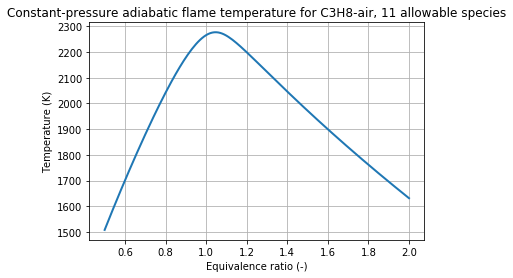

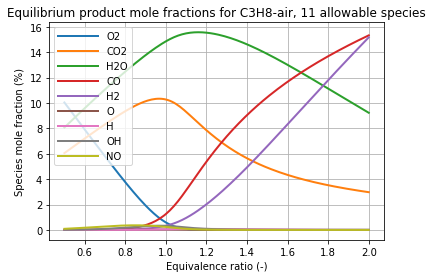

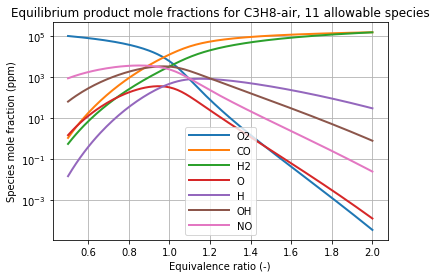

In [15]:
# define an ideal-gas mixture that contains C3H8, O2, N2, CO2, H2O, CO, H2, O, H, OH, and NO
species = {S.name: S for S in ct.Species.listFromFile('nasa.cti')}
eleven_species = [species[S] for S in ('C3H8','O2','N2','CO2','H2O','CO','H2','O','H','OH','NO')]
gas11 = ct.Solution(thermo='IdealGas', species=eleven_species)

# compute and plot the constant-pressure adiabatic flame temperature and the equilibrium species mole fractions
#   as functions of equivalence ratio, for reactants at 298.15 K and 1 atm

phimin = 0.5
phimax = 2.001
delphi = 0.01
phis   = np.arange(phimin,phimax,delphi)
nphi   = len(phis)
    
T_eq_11species    = np.zeros(nphi)
C3H8_eq_11species = np.zeros(nphi)
O2_eq_11species   = np.zeros(nphi)
N2_eq_11species   = np.zeros(nphi)
CO2_eq_11species  = np.zeros(nphi)
H2O_eq_11species  = np.zeros(nphi)
CO_eq_11species   = np.zeros(nphi)
H2_eq_11species   = np.zeros(nphi)
O_eq_11species    = np.zeros(nphi)
H_eq_11species    = np.zeros(nphi)
OH_eq_11species   = np.zeros(nphi)
NO_eq_11species   = np.zeros(nphi)
    
fuel = 'C3H8'
air  = 'O2:1., N2:3.76'

for i , phi in enumerate(phis):
    gas11.TP = 298.15, ct.one_atm                  # set mixture T and p to reactants T and p
    gas11.set_equivalence_ratio(phi, fuel, air)    # set mixture composition to reactants at the desired equiv. ratio
    gas11.equilibrate('HP')                        # compute the equilibrium mixture state
    T_eq_11species[i]    = gas11.T
    C3H8_eq_11species[i] = gas11.X[gas11.species_index('C3H8')]
    O2_eq_11species[i]   = gas11.X[gas11.species_index('O2')]
    N2_eq_11species[i]   = gas11.X[gas11.species_index('N2')]
    CO2_eq_11species[i]  = gas11.X[gas11.species_index('CO2')]
    H2O_eq_11species[i]  = gas11.X[gas11.species_index('H2O')]
    CO_eq_11species[i]   = gas11.X[gas11.species_index('CO')]
    H2_eq_11species[i]   = gas11.X[gas11.species_index('H2')]
    O_eq_11species[i]    = gas11.X[gas11.species_index('O')]
    H_eq_11species[i]    = gas11.X[gas11.species_index('H')]
    OH_eq_11species[i]   = gas11.X[gas11.species_index('OH')]
    NO_eq_11species[i]   = gas11.X[gas11.species_index('NO')]
    
# plot the constant-pressure adiabatic flame temperature versus equivalence ratio
fig, ax = plt.subplots()
ax.plot(phis, T_eq_11species, lw=2)
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Temperature (K)',
       title ='Constant-pressure adiabatic flame temperature for C3H8-air, 11 allowable species')
#ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("T_eq_11species_C3H8.pdf")

# plot the equilibrium species mole fractions versus equivalence ratio
# mole fraction are plotted as %, to facilitate comparison with Figure 2.13 of Turns 4th ed.
fig, ax = plt.subplots()
#ax.plot(phis, 100.*C3H8_eq_11species, label='C3H8', lw=2) # skip the fuel, since it essentially zero in equilibrium
ax.plot(phis, 100.*O2_eq_11species,   label='O2',   lw=2)
#ax.plot(phis, 100.*N2_eq_11species,   label='N2',   lw=2) # skip N2, to focus on more interesting species
ax.plot(phis, 100.*CO2_eq_11species,  label='CO2',  lw=2)
ax.plot(phis, 100.*H2O_eq_11species,  label='H2O',  lw=2)
ax.plot(phis, 100.*CO_eq_11species,   label='CO',   lw=2)
ax.plot(phis, 100.*H2_eq_11species,   label='H2',   lw=2)
ax.plot(phis, 100.*O_eq_11species,    label='O',    lw=2)
ax.plot(phis, 100.*H_eq_11species,    label='H',    lw=2)
ax.plot(phis, 100.*OH_eq_11species,   label='OH',   lw=2)
ax.plot(phis, 100.*NO_eq_11species,   label='NO',   lw=2)
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Species mole fraction (%)',
       title ='Equilibrium product mole fractions for C3H8-air, 11 allowable species')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("X_eq_11species_C3H8.pdf")

# plot the minor species in ppm and using a log scale, to facilitate comparison with Figure 2.14 of Turns 4th ed.
fig, ax = plt.subplots()
ax.semilogy(phis, 1000000.*O2_eq_11species,   label='O2',   lw=2)
ax.semilogy(phis, 1000000.*CO_eq_11species,   label='CO',   lw=2)
ax.semilogy(phis, 1000000.*H2_eq_11species,   label='H2',   lw=2)
ax.semilogy(phis, 1000000.*O_eq_11species,    label='O',    lw=2)
ax.semilogy(phis, 1000000.*H_eq_11species,    label='H',    lw=2)
ax.semilogy(phis, 1000000.*OH_eq_11species,   label='OH',   lw=2)
ax.semilogy(phis, 1000000.*NO_eq_11species,   label='NO',   lw=2)
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Species mole fraction (ppm)',
       title ='Equilibrium product mole fractions for C3H8-air, 11 allowable species')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("X_eq_11species_minor_log_C3H8.pdf")

The peak temperature decreased further, compared to the seven-species case. The results are in good quantitative agreement with those shown in Figures 2.13 and 2.14 of Turns 4th ed. Here results are shown over a wider range of equivalence ratios.

One could continue in this manner, to consider larger lists of allowable species. In general, any species that is in the list of allowable species will be present in the equilibrium mixture, although the mole fractions of many species may be negligible.

In general, the computed equilibrium temperature will decrease as more species are considered, although the temperature decrease will be negligible if the additional species are not important thermodynamically.

To see this more clearly, we plot the computed constant-pressure adiabatic flame temperatures as functions of equivalence ratio for the three sets of allowable species considered so far:

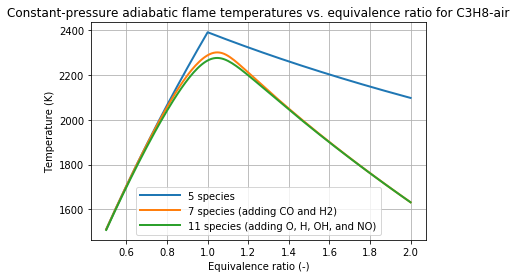

In [16]:
# plot the constant-pressure adiabatic flame temperatures versus equivalence ratio, 
#   for different lists of allowable species
fig, ax = plt.subplots()
plt.plot(phis, T_eq_5species,  label='5 species',                            lw=2)
plt.plot(phis, T_eq_7species,  label='7 species (adding CO and H2)',         lw=2)
plt.plot(phis, T_eq_11species, label='11 species (adding O, H, OH, and NO)', lw=2)
ax.set(xlabel='Equivalence ratio (-)',
       ylabel='Temperature (K)',
       title ='Constant-pressure adiabatic flame temperatures vs. equivalence ratio for C3H8-air')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("T_eq_different-species_C3H8.pdf")

It can be verified by numerical experiments that adding more species to the allowable species list for the current problem does not further reduce the computed adiabatic flame temperature appreciably, nor does it significantly change the equilibrium mole fractions for the 11 species that have been considered up to this point. That is, there are diminishing returns as more species are considered, and the species that we have considered here are, in fact, the most important species thermodynamically for this problem.

This does not imply that these 11 species will always be sufficient. Picking an appropriate set of allowable species for a particular problem is a matter of experience. In general, there is no harm (other than increased computational time) in including all of the species that are available in the thermodynamic database that is being used.